In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [5]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [7]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [9]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

#Check if the data types are right 
df_uk_full.dtypes

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_32956\3670151657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_32956\250439429.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2008-01-01', end='2012-12-31', freq='M')


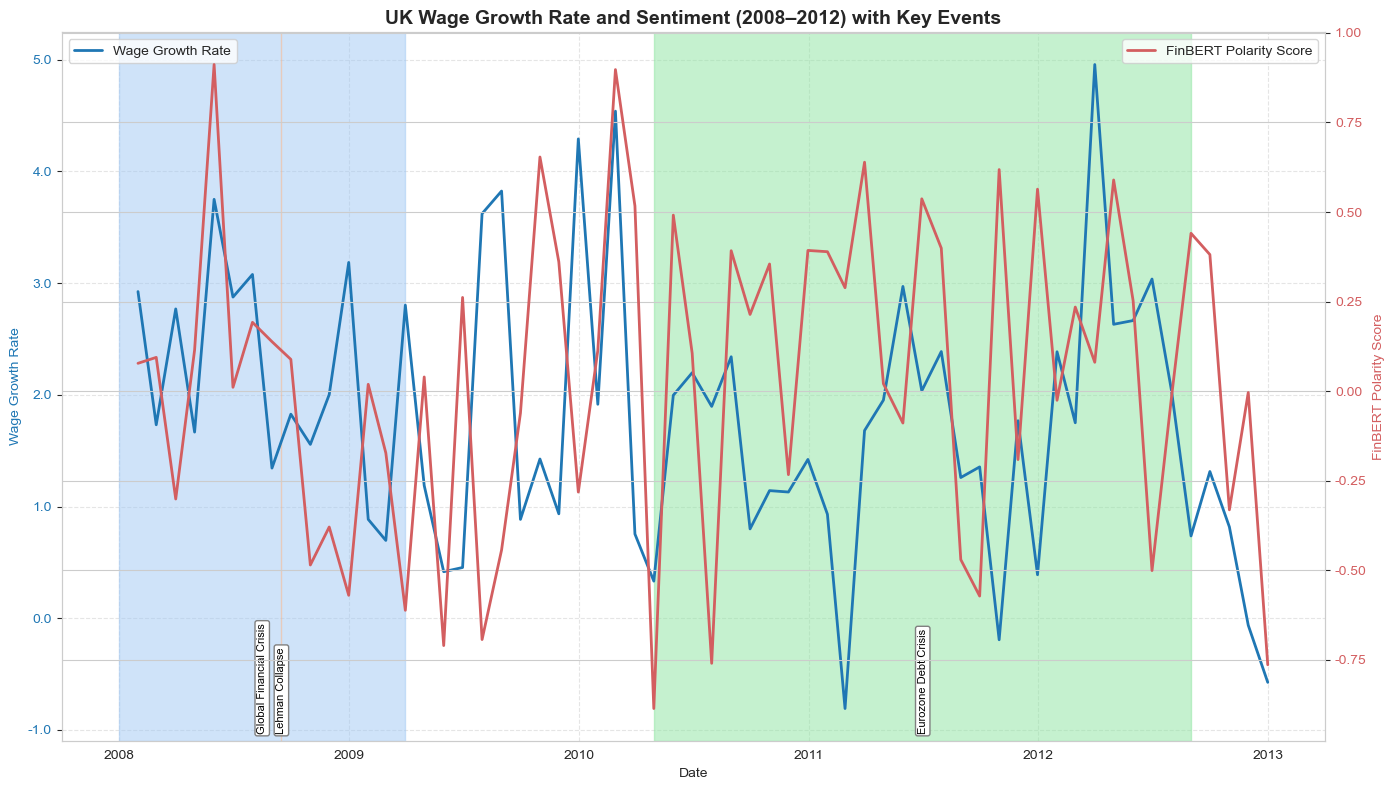

In [23]:
# Create sample dataset
date_range = pd.date_range(start='2008-01-01', end='2012-12-31', freq='M')
df_uk_2008_2012 = pd.DataFrame({
    'Date': date_range,
    'wage_growth_rate': np.random.normal(loc=2, scale=1.2, size=len(date_range)),
    'polarity_score_finbert': np.random.normal(loc=0, scale=0.4, size=len(date_range))
})

# Filter and clean the data
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot.dropna(subset=['wage_growth_rate', 'polarity_score_finbert'], inplace=True)

# Define relevant events in the date range
events = {
    'Global Financial Crisis': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'}
}

# Initialize plot
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot wage growth rate
color_wage = '#1F77B4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Wage Growth Rate', color=color_wage, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['wage_growth_rate'], color=color_wage, label='Wage Growth Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_wage)

# Plot sentiment on secondary axis
ax2 = ax1.twinx()
color_sent = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sent, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sent, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sent)

# Shade events with labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
for i, (event_name, dates) in enumerate(events.items()):
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])
    display_start = max(start, start_date)
    display_end = min(end, end_date)
    ax1.axvspan(display_start, display_end, color=event_colors[i], alpha=0.5)
    label_x = display_start + (display_end - display_start) / 2
    ax1.text(label_x, 0.01, event_name, rotation=90, fontsize=8, color='black',
             ha='center', va='bottom', transform=ax1.get_xaxis_transform(),
             bbox=dict(facecolor='white', alpha=1, edgecolor='gray', boxstyle='round,pad=0.2'))

# Formatting
plt.title('UK Wage Growth Rate and Sentiment (2008–2012) with Key Events', fontsize=14, fontweight='bold')
fig.tight_layout()
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Add legends and grid
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)

plt.show()

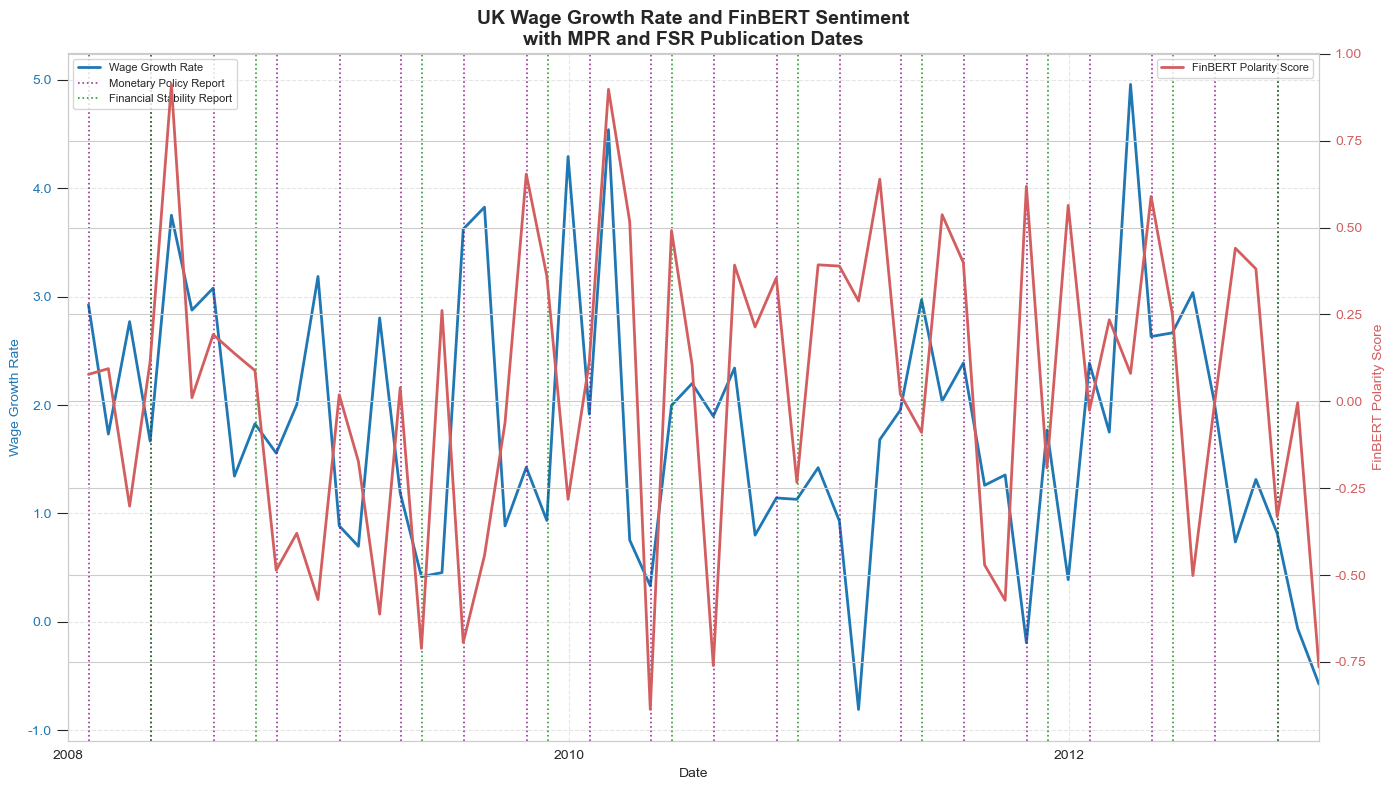

In [25]:
start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['wage_growth_rate', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#d35e60'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Wage Growth Rate', color=color_cs, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['wage_growth_rate'], color=color_cs, label='Wage Growth Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cs, size=8)


# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Wage Growth Rate and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

#### Drop unncessary columns to reduce the number of variables to be explored

In [28]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['ftse_250_price',
                            'ftse_350_Price',
                            'ftse_350_Total Return (Gross, Unhedged)',
                            'price_02_Price',
                            'price_05_Price',
                            'price_05_Total Return (Gross, Unhedged)',
                            'price_10_Price',
                            'price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [30]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [174]:
# Ensure 'Date' is in datetime format
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])

# Filter data to start from 1 March 2001
df_uk_focused = df_uk_focused[df_uk_focused['Date'] >= '2001-03-01'].copy()

# Define the new column order
new_column_order = [
    'Date', 'wage_growth_rate', 'confidence_score', 'finbert_sentiment_score',
    'CPI_pct_change', 'unemployment_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reorder the DataFrame columns
df_uk_focused = df_uk_focused[new_column_order]

# Display the first few rows
df_uk_focused.head()

,Date,wage_growth_rate,confidence_score,finbert_sentiment_score,CPI_pct_change,unemployment_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
136,2001-03-01,6.1,3.0,0.191264,0.9,5.0,0.4,2802.949951,5.625000,119.314
137,2001-04-01,6.2,1.0,0.229204,1.2,4.9,0.4,2958.949951,5.500000,119.809
138,2001-05-01,5.1,2.0,-0.143061,1.7,5.0,0.4,3044.310059,5.250000,120.240
139,2001-06-01,5.5,6.0,-0.173690,1.7,5.0,0.5,2925.889893,5.166667,120.458
140,2001-07-01,5.2,4.0,0.439598,1.4,5.1,0.5,2830.649902,5.083333,121.387


### Corraletion Analysis

#### Create pairplot for visual correlation analysis

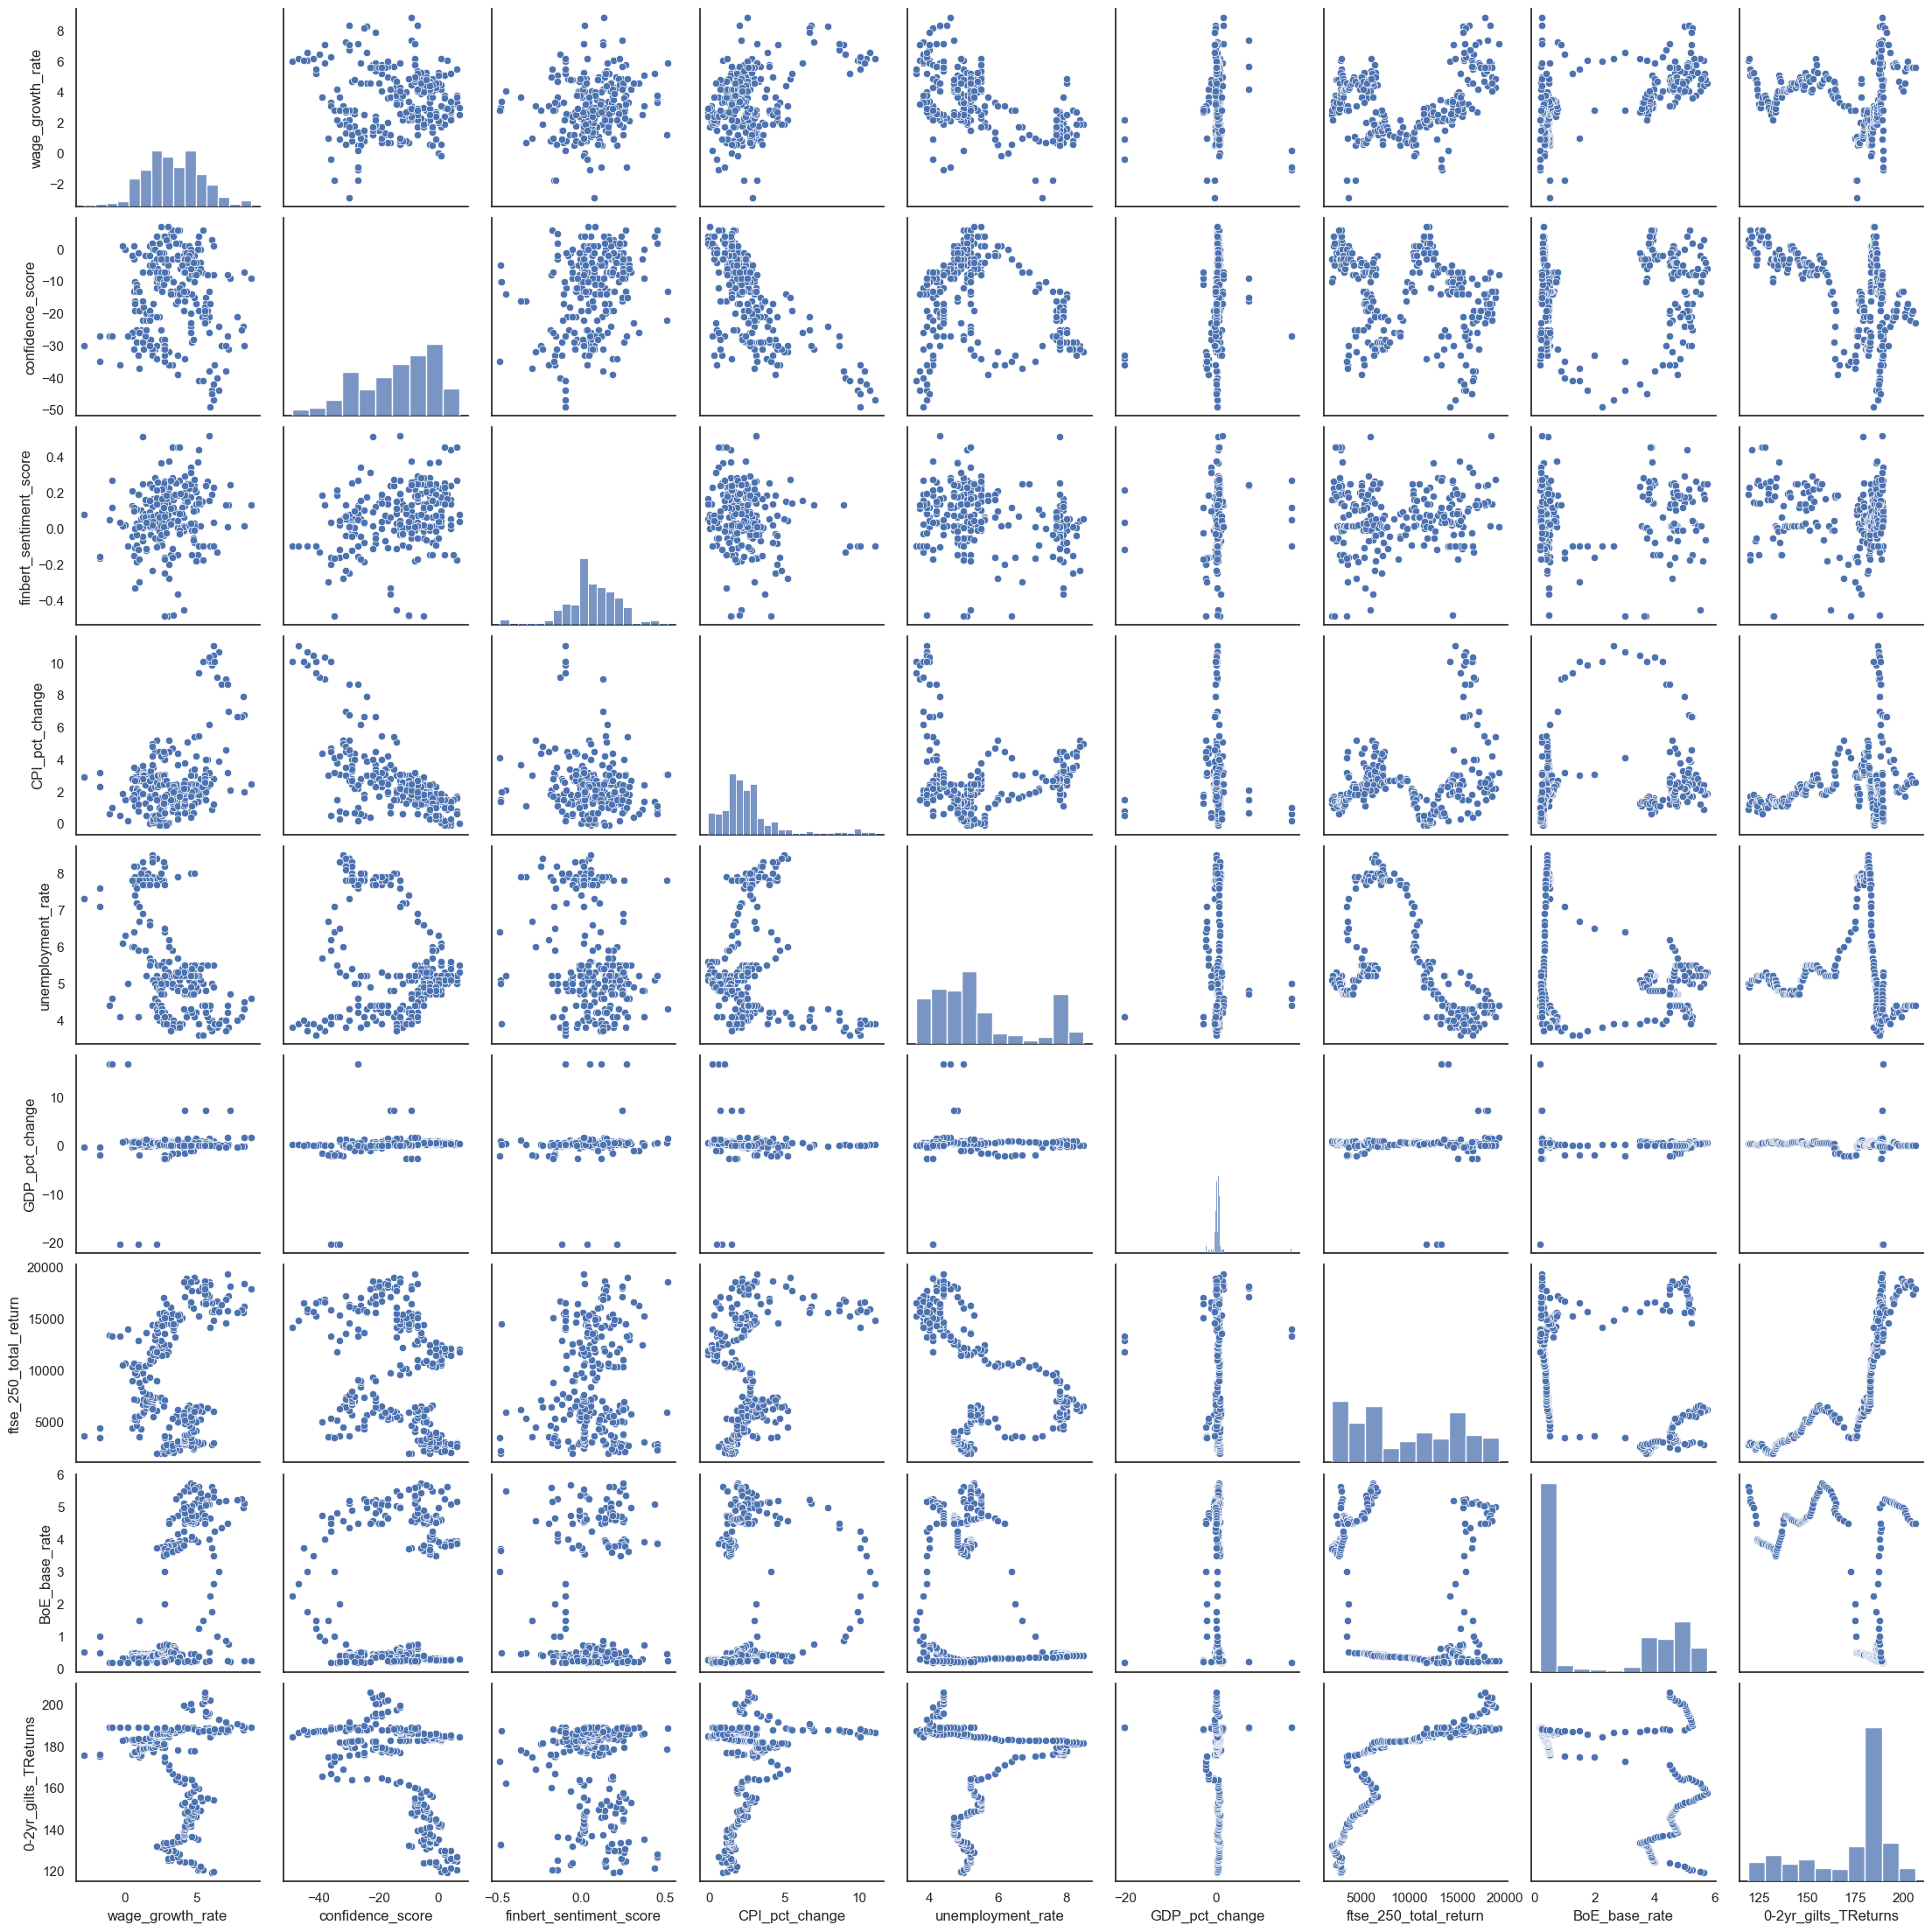

In [178]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices

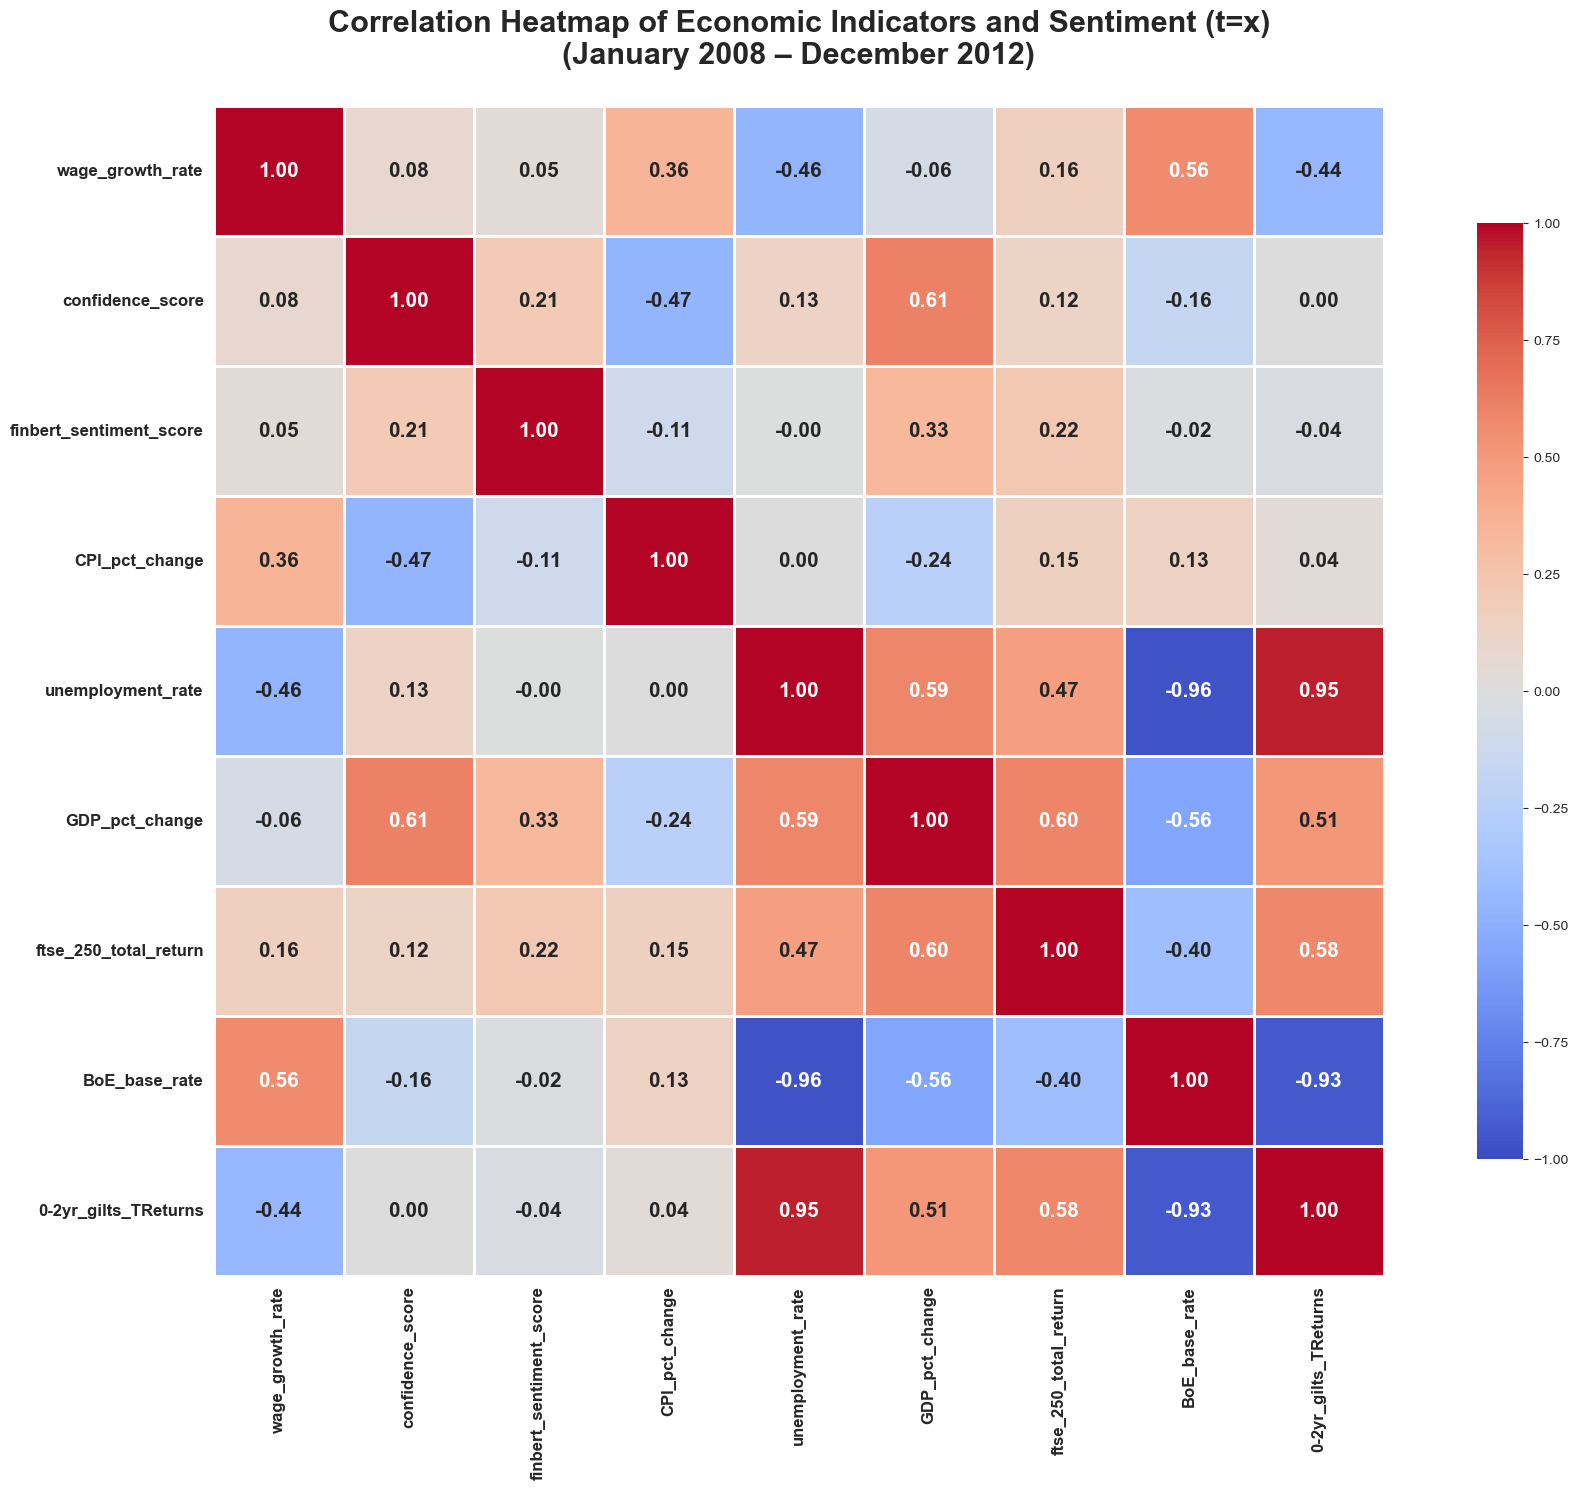

In [41]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=x)\n(January 2008 – December 2012)', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

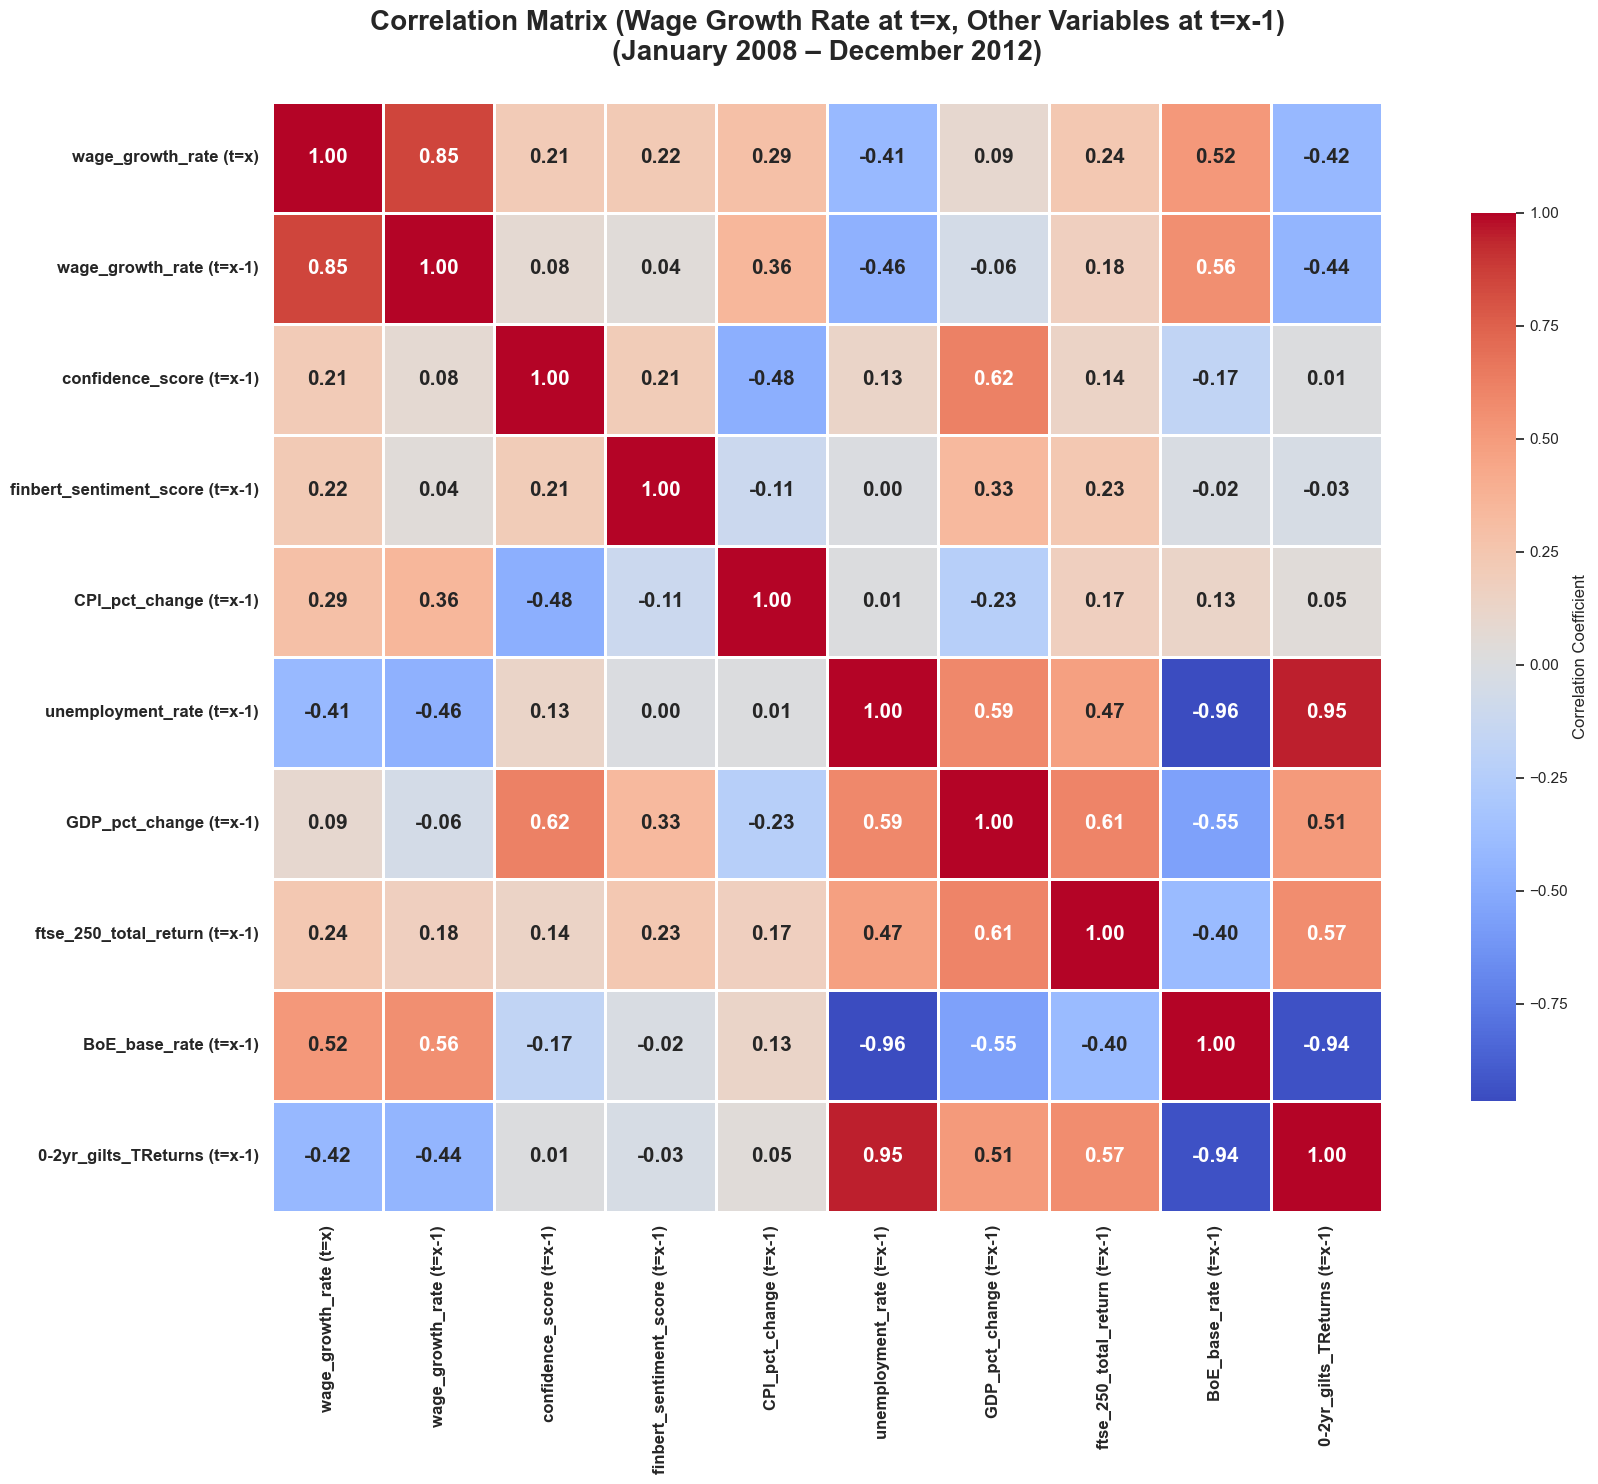

In [43]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-1)\n(January 2008 – December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

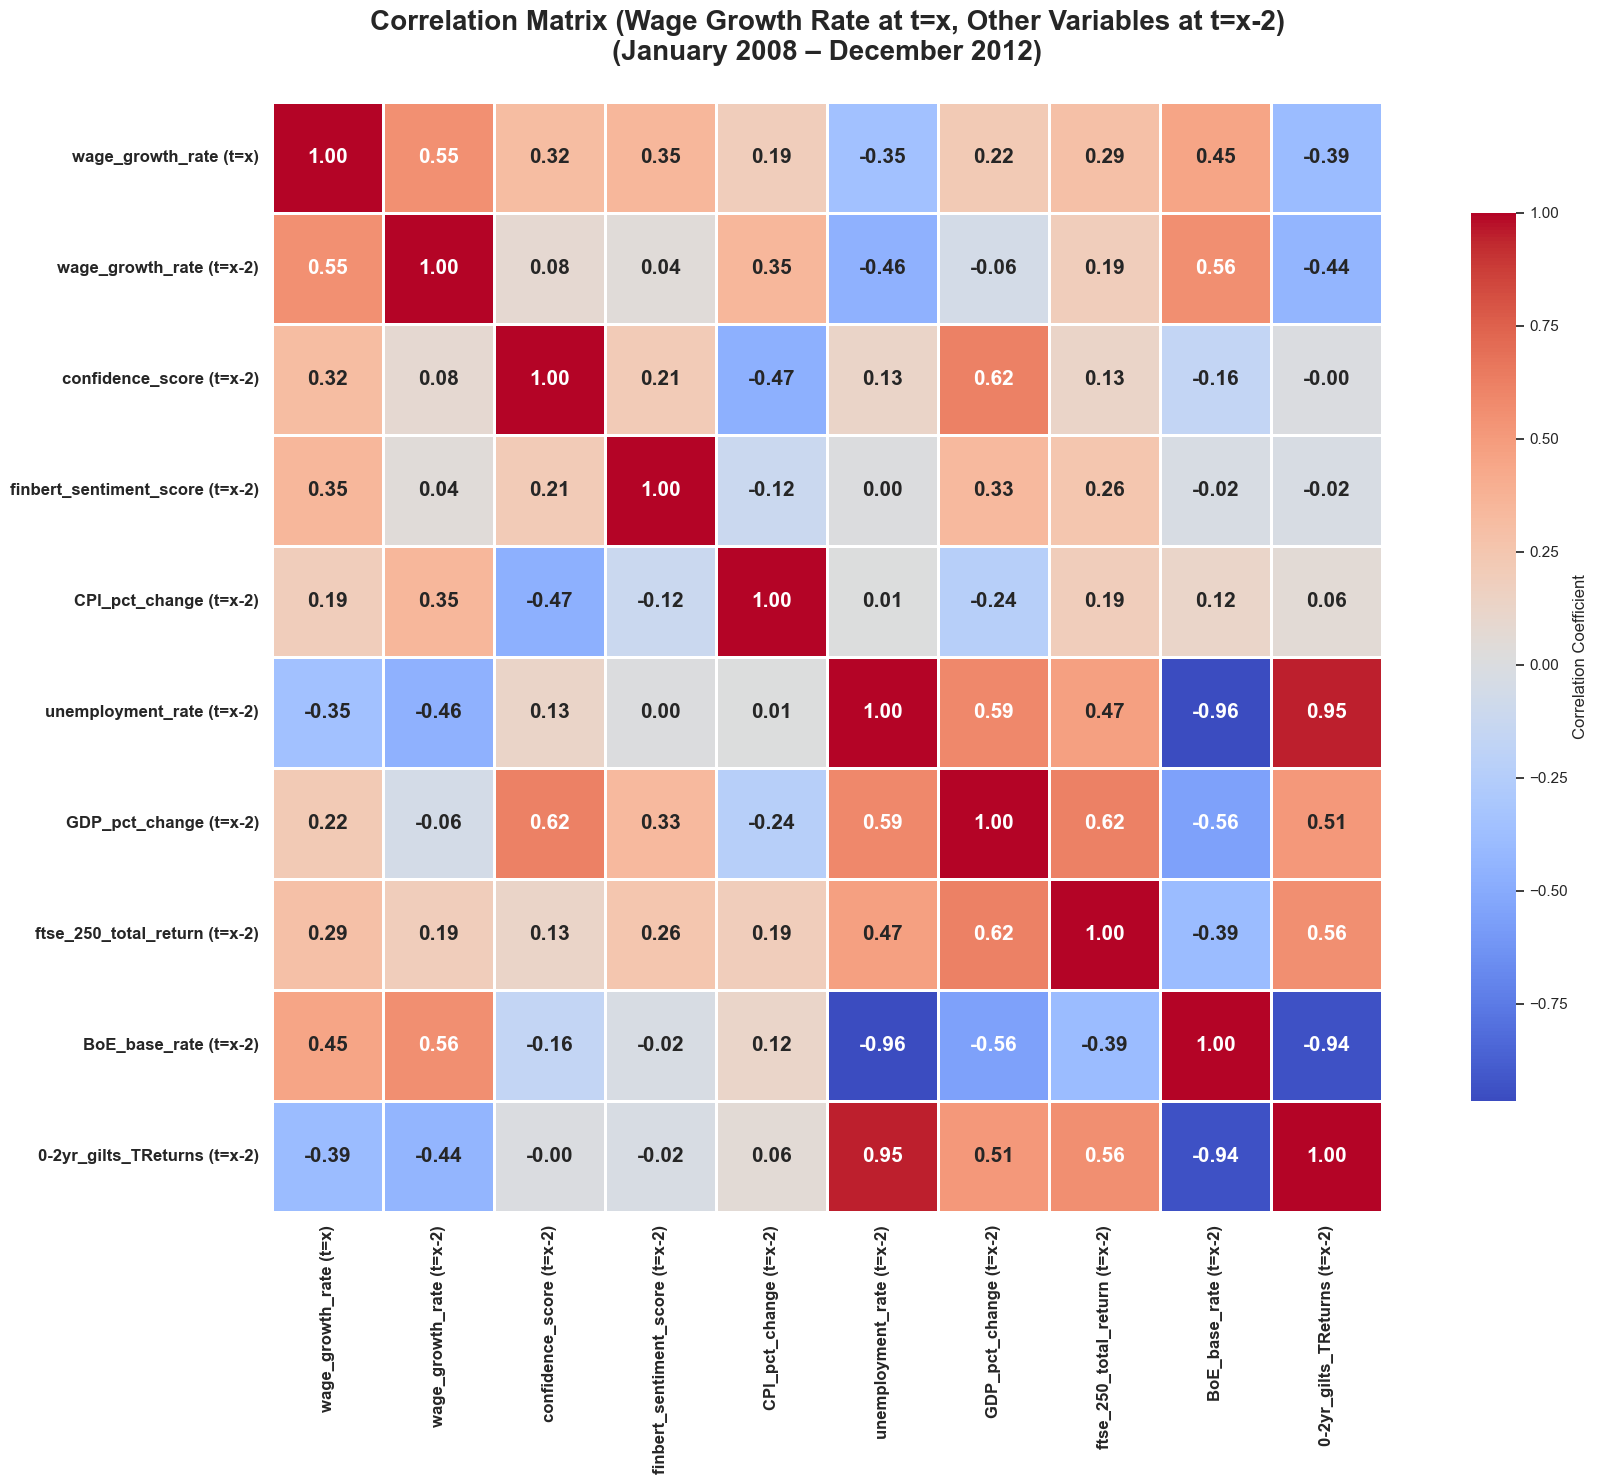

In [51]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 2 month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-2)\n(January 2008 – December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

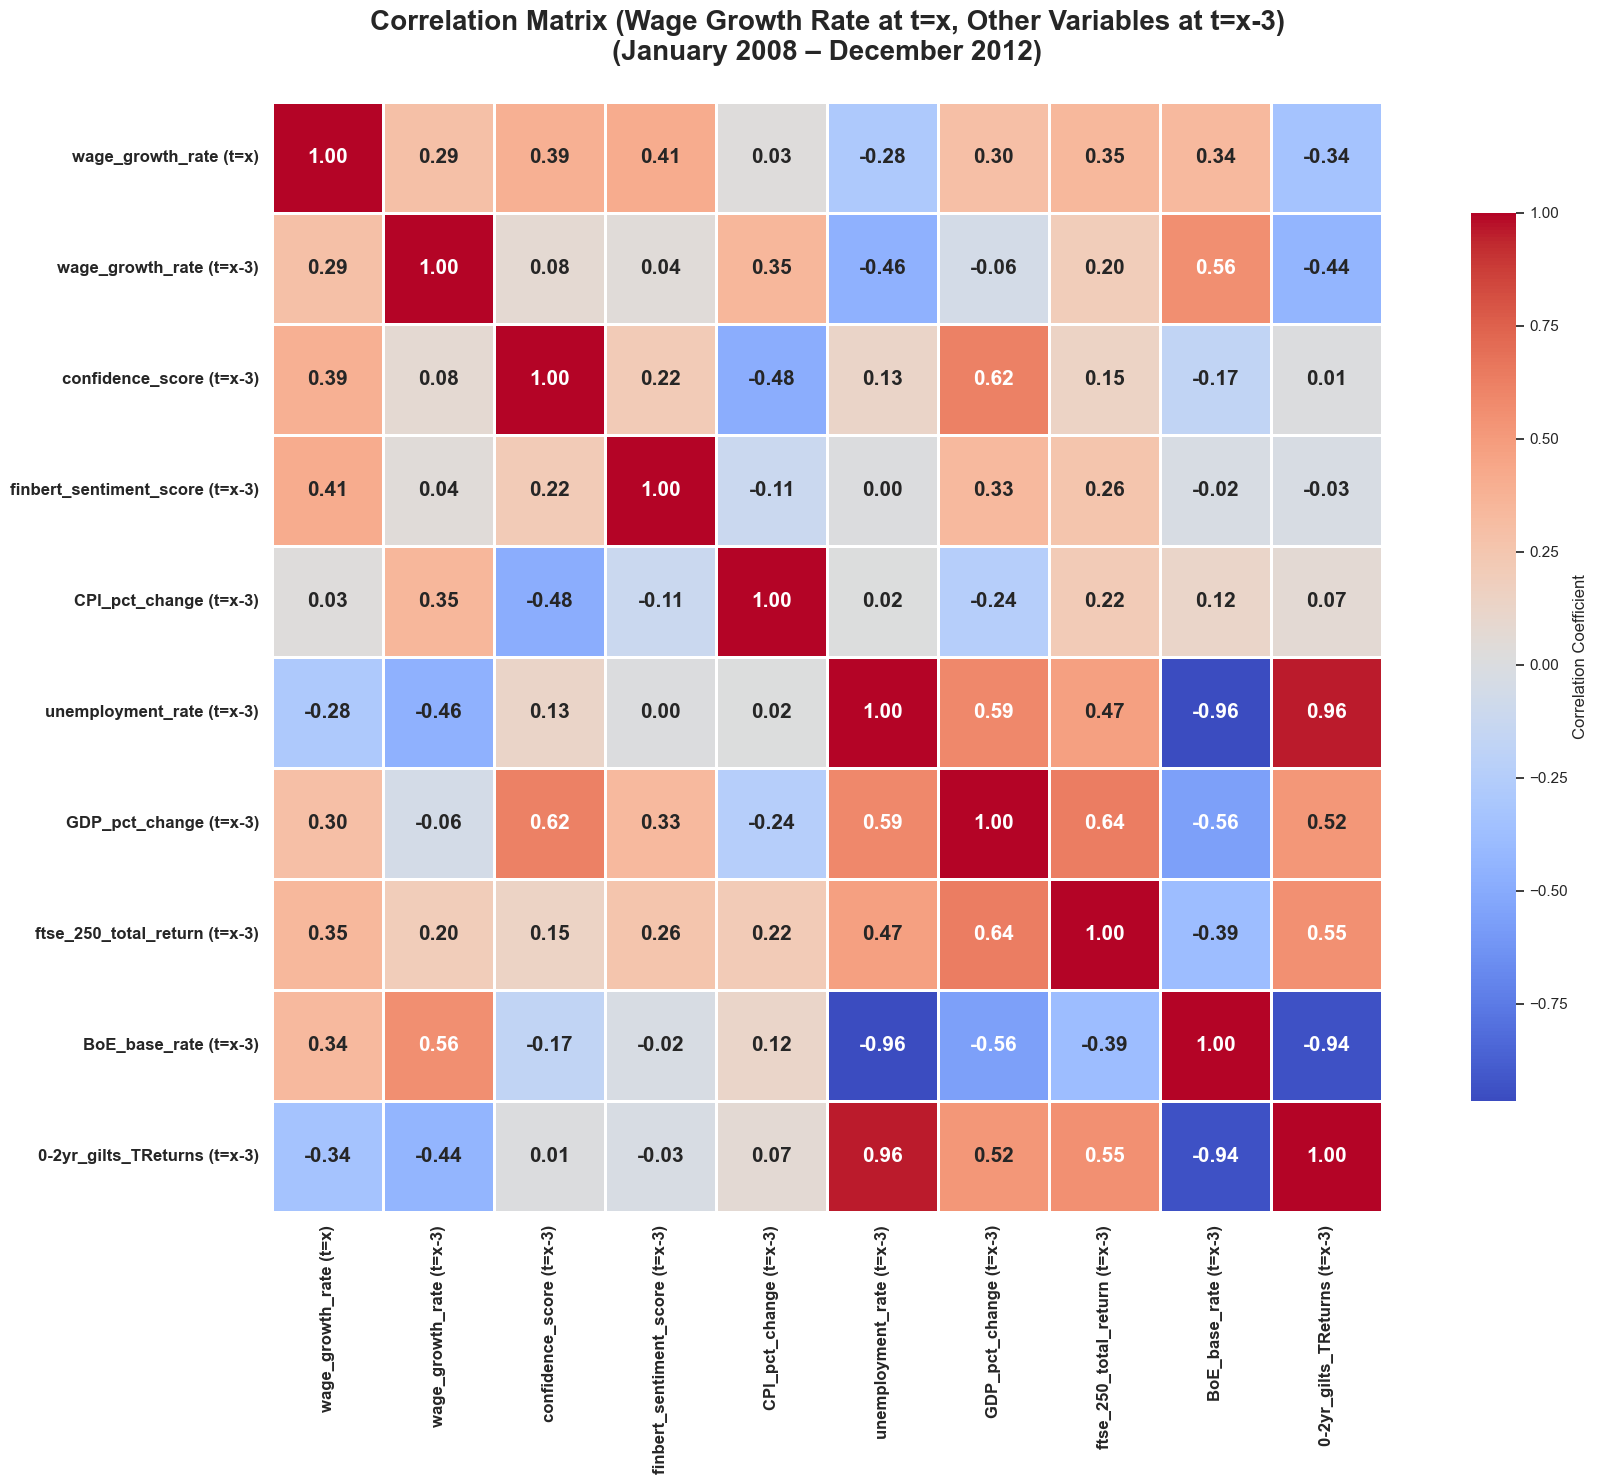

In [53]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-3)\n(January 2008 – December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Based on the correlation results, 0–2 year gilts total returns, BoE base rate, and unemployment rate were selected for further analysis. These variables consistently show the strongest relationships with the wage growth rate, particularly at current and recent time lags. The BoE base rate shows a strong positive correlation at t=0, unemployment rate has a notable negative correlation at both t=x and t=x-1, and 0–2 year gilts show moderate negative associations, suggesting meaningful influence on wage dynamics.

In [70]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"

filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['wage_growth_rate (t=x)'] = filtered_df['wage_growth_rate']
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(1)
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['unemployment_rate (t=x-1)'] = filtered_df['unemployment_rate'].shift(1)
regression_df['0-2yr_gilts_TReturns (t=x)'] = filtered_df['0-2yr_gilts_TReturns']
# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,wage_growth_rate (t=x),wage_growth_rate (t=x-1),BoE_base_rate (t=x),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x)
wage_growth_rate (t=x),1.000000,0.848913,0.547988,-0.405371,-0.415460
wage_growth_rate (t=x-1),0.848913,1.000000,0.575417,-0.462555,-0.431903
BoE_base_rate (t=x),0.547988,0.575417,1.000000,-0.951727,-0.926728
unemployment_rate (t=x-1),-0.405371,-0.462555,-0.951727,1.000000,0.943552
0-2yr_gilts_TReturns (t=x),-0.415460,-0.431903,-0.926728,0.943552,1.000000


In [72]:
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    ['wage_growth_rate (t=x-1)','BoE_base_rate (t=x)', 'unemployment_rate (t=x-1)',
     '0-2yr_gilts_TReturns (t=x)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: 0.16326041781315737
Coefficients:
wage_growth_rate (t=x-1)      0.728966
BoE_base_rate (t=x)           0.569367
unemployment_rate (t=x-1)     1.070984
0-2yr_gilts_TReturns (t=x)   -0.047071
dtype: float64


In [74]:
LinearRegression()

LinearRegression()

In [76]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 3.7784603 ,  3.51743771,  3.93338162,  4.16468922,  4.38338868,
        4.01312805,  3.76436955,  3.54943864,  3.356963  ,  2.63487609,
        1.95957789,  1.78731181,  0.38774088, -1.53074145, -2.13601068,
       -1.01774738,  0.88592241,  1.40978426,  1.15772216,  1.04652967,
        1.07503693,  0.87753259,  0.95292502,  0.83528378,  1.97675549,
        3.9706464 ,  4.18270022,  3.18060327,  1.33893753,  1.08392884,
        1.20764675,  1.27555488,  1.52487011,  1.65927315,  1.73386537,
        1.80676303,  2.27897861,  2.20278812,  2.21371204,  1.78737639,
        2.10332775,  2.2667077 ,  2.68975744,  2.72090068,  2.45217306,
        2.33159216,  2.21315072,  2.10327622,  1.59111832,  1.19102252,
        1.03977017,  1.42308499,  1.46408734,  1.51377895,  1.33627982,
        1.37911795,  1.45418088,  1.38279164,  1.23248071])

In [78]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))


R-squared:  0.7567580496638127
Intercept:  0.16326041781315737
Coefficients:


[('wage_growth_rate (t=x-1)', 0.7289658935435532),
 ('BoE_base_rate (t=x)', 0.5693669872540389),
 ('unemployment_rate (t=x-1)', 1.0709838012294688),
 ('0-2yr_gilts_TReturns (t=x)', -0.04707109006322589)]

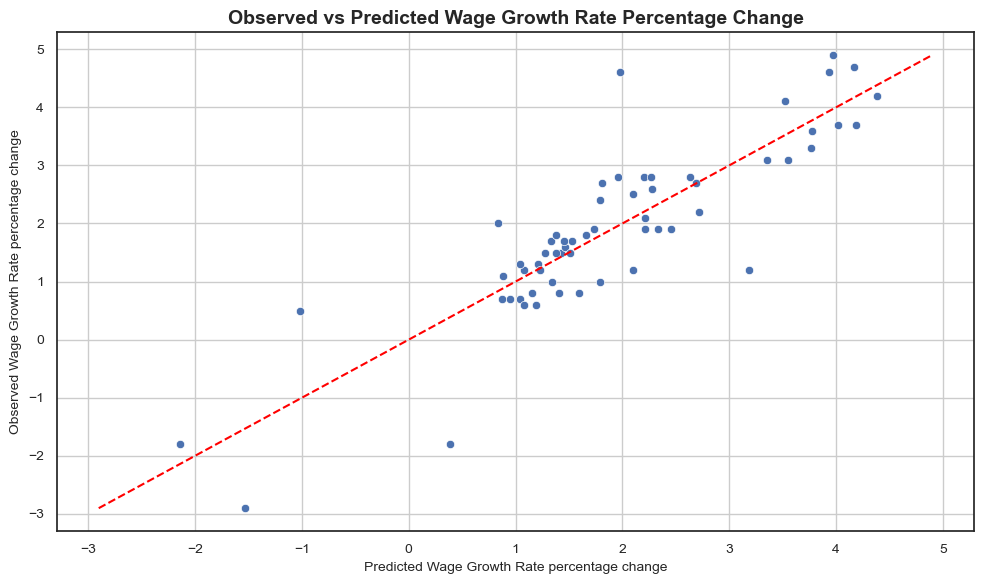

In [82]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['wage_growth_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Wage Growth Rate percentage change', fontsize=10)
plt.ylabel('Observed Wage Growth Rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Wage Growth Rate Percentage Change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [88]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [90]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model) 

                              OLS Regression Results                              
Dep. Variable:     wage_growth_rate (t=x)   R-squared:                       0.716
Model:                                OLS   Adj. R-squared:                  0.689
Method:                     Least Squares   F-statistic:                     26.44
Date:                    Sun, 18 May 2025   Prob (F-statistic):           5.41e-11
Time:                            01:39:34   Log-Likelihood:                -46.070
No. Observations:                      47   AIC:                             102.1
Df Residuals:                          42   BIC:                             111.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

#### The regression model shows a moderate fit, with an R-squared of 0.716, meaning around 72% of the variation in wage growth is explained by the included predictors. Among them, only wage growth rate (t=x-1) is statistically significant (p < 0.001) with a strong positive effect. Other variables—including the BoE base rate, unemployment rate, and 2-year gilts returns—are not statistically significant.The Durbin-Watson statistic (~1.95) suggests no serious autocorrelation in the residuals. However, the condition number is very high (1.72e+04), which may point to multicollinearity or numerical instability. This should be investigated further. Overall, the model captures key dynamics but may benefit from refinement or a larger sample size.

In [93]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [95]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 2.28879472  1.45681507  3.350584    1.40072469  3.68218969  4.24520194
  1.57355445  1.18088673  1.39828745  1.14693211  2.18236144  1.65787457
 -0.43711246  2.89128447  2.93602697  3.69189893  1.00959289  1.92470963
  1.7280113   1.71711391  2.22691837  2.28603859  1.61028     1.61220408
  2.13459092  2.22780997  1.28161904  2.4485524   3.61676851  1.05726435
  3.90905307  1.99918421  1.92190827  1.84622778  1.07971474  1.54324796
  2.42423051  1.11653647  1.21706697  1.53565979  1.15461954  3.47483226
  2.47455738 -1.19892326  1.43728357  1.52806658  2.30895545]


In [97]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 3.78425149  3.94550123  1.78720382 -0.60802308  2.03608554  1.66891964
  1.65660676  3.51385424  1.96313508  1.10345978  1.26797272  4.14647862]


In [99]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

72.33064634528115


#### The multiple linear regression model explains approximately 72.33% of the variance in the dependent variable, as indicated by the R-squared value. This suggests the model has a fairly strong explanatory power, although there's still around 28% of the variability left unexplained, potentially due to omitted variables or noise.

### Check for multicollinearity¶

In [103]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                    features
0      9377.1                       const
1         1.6    wage_growth_rate (t=x-1)
2        15.6         BoE_base_rate (t=x)
3        14.8   unemployment_rate (t=x-1)
4         8.1  0-2yr_gilts_TReturns (t=x)


#### The VIF results show signs of multicollinearity in the model. Both the BoE base rate (15.6) and unemployment rate (14.8) exceed the common threshold of 10, indicating strong multicollinearity. The 0–2yr gilts returns also shows moderate multicollinearity with a VIF of 8.1, while wage growth rate (t=x-1) is within a safe range at 1.6. The intercept has a very high VIF, which is typical and not a concern. Overall, the presence of high VIF values suggests the need to address multicollinearity, possibly by revising or simplifying the model.

### Check normality of regression residuals - assumption of MLR

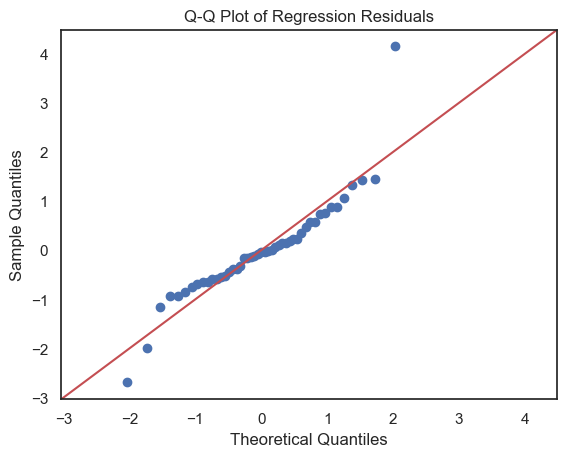

In [107]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that most residuals follow the diagonal line, indicating that the residuals are approximately normally distributed. However, there are slight deviations at the extremes, especially on the upper tail, suggesting the presence of some outliers or mild non-normality.

### Evaluate the model

In [111]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.7975310388159906
Mean Square Error (Final): 1.4265088995321282


#### The model's performance shows moderate prediction error, with a Mean Absolute Error (MAE) of 0.798 and a Mean Squared Error (MSE) of 1.427. These values indicate that, on average, predictions deviate from actual wage growth by around 0.8 units, with some larger errors reflected in the higher MSE. This suggests the model may benefit from further refinement or additional predictive features.

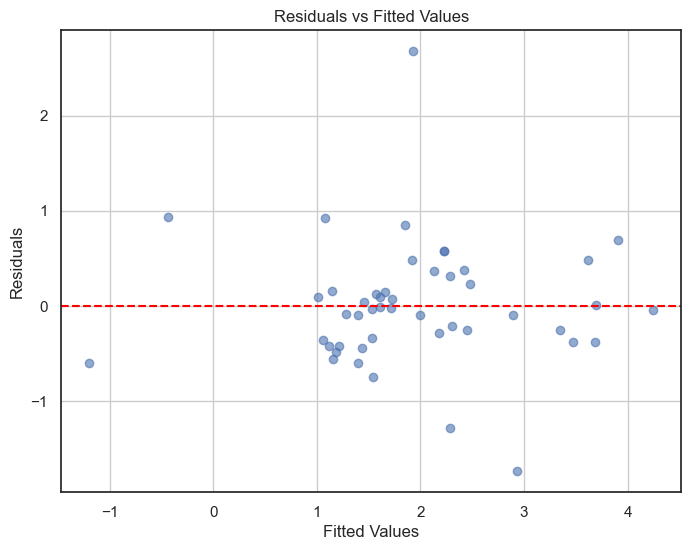

In [114]:
# Fitted values from statsmodels
fitted_vals = model1.fittedvalues
residuals = model1.resid

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()


#### The residuals vs. fitted values plot shows a generally random scatter around the zero line, indicating that the assumptions of linearity and homoskedasticity are mostly met. However, the spread appears slightly uneven, with a few outliers, suggesting some minor heteroskedasticity or model misspecification.

#### Multiple linear regression: Drop base rate, and 0-2 Year Gilts as variables and explore transformation of dependent variable

### Re-perform MLR

In [119]:
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    ['wage_growth_rate (t=x-1)','unemployment_rate (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [121]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 3.50138575,  3.33499532,  3.74842202,  4.16694744,  4.24504393,
        3.82651851,  3.40544373,  3.06756416,  2.89862438,  2.89352565,
        2.6388413 ,  2.63629194,  1.1336794 , -1.20598398, -2.12623004,
       -1.21873079,  0.68966037,  1.18628228,  0.93669664,  0.939246  ,
        0.85350143,  0.77285558,  0.85605079,  0.85860015,  1.93503919,
        4.09556534,  4.34515097,  3.34935779,  1.26947749,  1.10563643,
        1.27202685,  1.35522206,  1.51906313,  1.68545355,  1.76864876,
        1.85184397,  2.51995503,  2.43675982,  2.6056996 ,  2.02078376,
        2.26782003,  2.34846589,  2.5929528 ,  2.50720823,  2.08868281,
        1.83654781,  1.83909717,  1.84164653,  1.25928005,  0.92904856,
        0.76265813,  1.34757398,  1.51651377,  1.59970898,  1.51906313,
        1.68800291,  1.77119812,  1.68800291,  1.52161249])

In [123]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

R-squared:  0.7208585386361633
Intercept:  0.47253445809946726
Coefficients:


[('wage_growth_rate (t=x-1)', 0.8319521205265306),
 ('unemployment_rate (t=x-1)', -0.025493609220162954)]

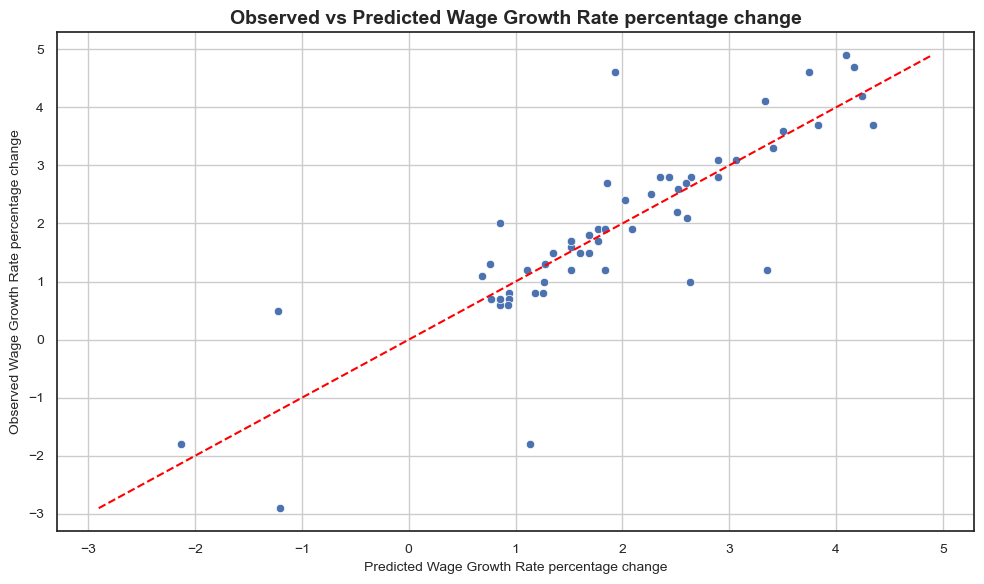

In [144]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['wage_growth_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Wage Growth Rate percentage change', fontsize=10)
plt.ylabel('Observed Wage Growth Rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Wage Growth Rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR


In [147]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [149]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     wage_growth_rate (t=x)   R-squared:                       0.702
Model:                                OLS   Adj. R-squared:                  0.689
Method:                     Least Squares   F-statistic:                     51.86
Date:                    Sun, 18 May 2025   Prob (F-statistic):           2.68e-12
Time:                            02:12:03   Log-Likelihood:                -47.167
No. Observations:                      47   AIC:                             100.3
Df Residuals:                          44   BIC:                             105.9
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [151]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                   features
0       114.3                      const
1         1.3   wage_growth_rate (t=x-1)
2         1.3  unemployment_rate (t=x-1)


In [153]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [159]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 0.18319313685947458, 'LM Test p-value': 0.9124731957935621, 'F-stat': 0.086085516739534, 'F-test p-value': 0.917669908842251}


#### The regression model explains about 70.2% of the variation in wage growth, with wage growth rate (t=x-1) being a strong and statistically significant predictor (p < 0.001). The unemployment rate (t=x-1) is not significant at the 5% level. VIF values are low (1.3), indicating no multicollinearity issues. The Breusch-Pagan test p-values (> 0.91) show no evidence of heteroskedasticity, supporting the assumption of constant error variance. Overall, the model is statistically sound with a good fit and stable predictors.

In [162]:
regression_df.describe()

,Date,wage_growth_rate (t=x),wage_growth_rate (t=x-1),BoE_base_rate (t=x),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x)
count,59,59.0000,59.000000,59.000000,59.000000,59.000000
mean,2010-07-01 20:20:20.338983168,1.9000,1.944068,1.207080,7.449153,177.298051
min,2008-02-01 00:00:00,-2.9000,-2.900000,0.373596,5.200000,163.862000
25%,2009-04-16 00:00:00,1.1500,1.150000,0.414326,7.450000,175.924500
50%,2010-07-01 00:00:00,1.8000,1.800000,0.455056,7.800000,178.901000
75%,2011-09-16 00:00:00,2.8000,2.800000,0.495787,7.950000,181.455500
max,2012-12-01 00:00:00,4.9000,4.900000,5.250000,8.500000,182.796000
std,NaN,1.5031,1.520239,1.613975,0.952741,5.459863


In [164]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 219 to 277
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        59 non-null     datetime64[ns]
 1   wage_growth_rate (t=x)      59 non-null     float64       
 2   wage_growth_rate (t=x-1)    59 non-null     float64       
 3   BoE_base_rate (t=x)         59 non-null     float64       
 4   unemployment_rate (t=x-1)   59 non-null     float64       
 5   0-2yr_gilts_TReturns (t=x)  59 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.2 KB


In [166]:
regression_df.head()

,Date,wage_growth_rate (t=x),wage_growth_rate (t=x-1),BoE_base_rate (t=x),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x)
219,2008-02-01,3.6,3.8,5.250000,5.2,163.862
220,2008-03-01,4.1,3.6,5.125000,5.2,164.798
221,2008-04-01,4.6,4.1,5.000000,5.3,164.468
222,2008-05-01,4.7,4.6,4.916667,5.2,164.014
223,2008-06-01,4.2,4.7,4.833333,5.4,164.459


Root Mean Squared Error: 1.0333
Mean Squared Error: 1.0677
Mean Absolute Error: 0.6157
R² Score: 0.7349


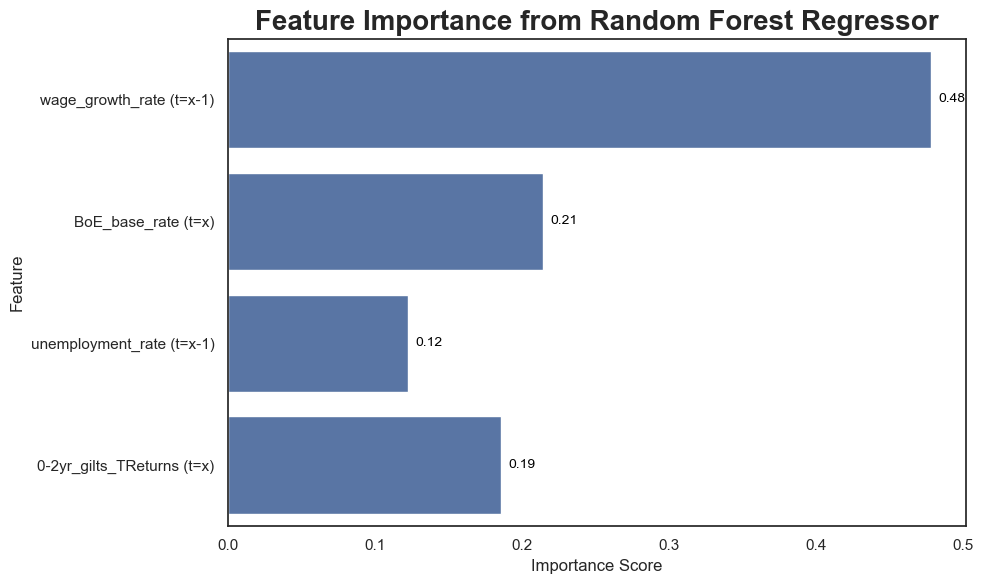

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas


# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['wage_growth_rate (t=x)','wage_growth_rate (t=x-1)','BoE_base_rate (t=x)', 'unemployment_rate (t=x-1)',
     '0-2yr_gilts_TReturns (t=x)'
])
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    [
'wage_growth_rate (t=x-1)','BoE_base_rate (t=x)', 'unemployment_rate (t=x-1)',
     '0-2yr_gilts_TReturns (t=x)'
    ]
]
y = regression_df['wage_growth_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 0.9837
Mean Squared Error: 0.9676
Mean Absolute Error: 0.5738
R² Score: 0.7598


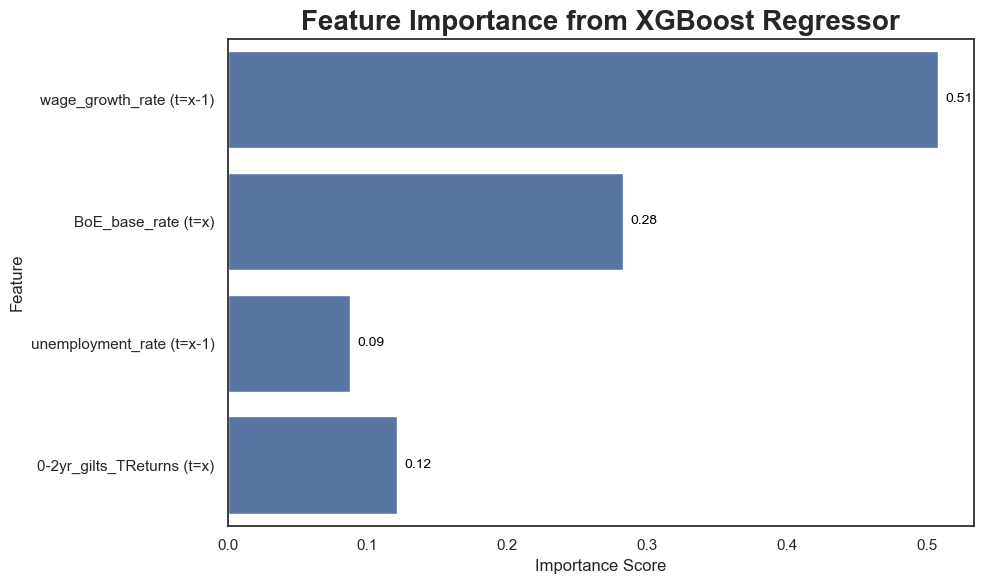

In [170]:
from xgboost import XGBRegressor

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['wage_growth_rate (t=x)','wage_growth_rate (t=x-1)','BoE_base_rate (t=x)', 'unemployment_rate (t=x-1)',
     '0-2yr_gilts_TReturns (t=x)'
])
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    [
'wage_growth_rate (t=x-1)','BoE_base_rate (t=x)', 'unemployment_rate (t=x-1)',
     '0-2yr_gilts_TReturns (t=x)'
    ]
]
y = regression_df['wage_growth_rate (t=x)']
# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

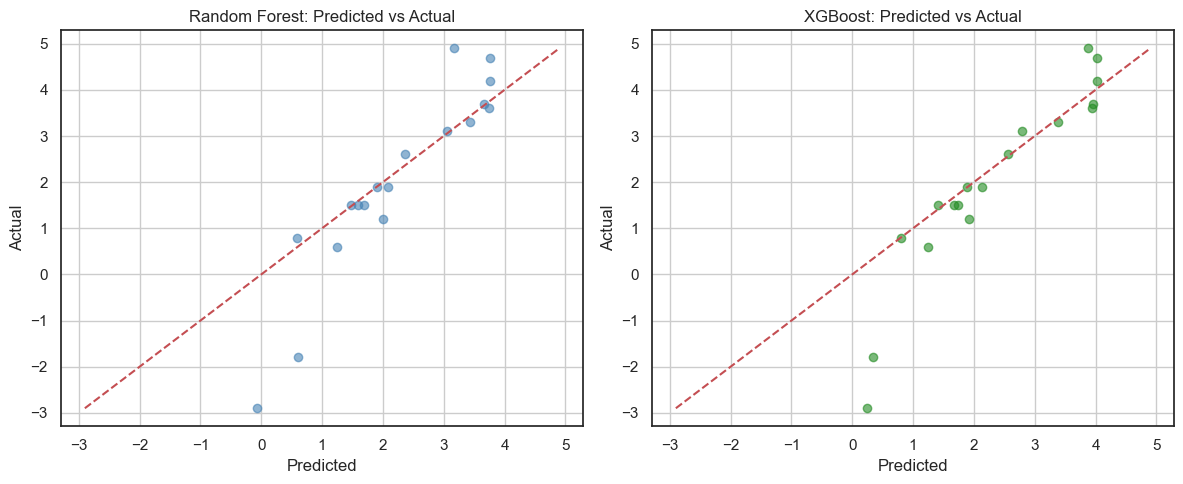

In [172]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both the Random Forest and XGBoost models perform reasonably well in predicting wage growth, with R² scores of 0.735 and 0.760, respectively. In both models, the lagged wage growth rate (t=x-1) is the most important predictor, contributing nearly half of the total importance. XGBoost places greater emphasis on the BoE base rate, while Random Forest distributes importance more evenly across features. The predicted vs. actual plots show that both models produce values close to the true observations, though XGBoost demonstrates slightly tighter alignment with the ideal prediction line, suggesting marginally better accuracy and generalization.